# Data Processing
This is the script that processes my data files.

### Table of Contents
- [Part 1](#1-Importing-libraries-and-packages)
- [Part 2](#2.-Reading-in-and-Parsing-the-Data)
- [Part 3](#3.-String-Manipulation)
- [Part 4](#4.-Some-Descriptive-Analysis)

## 1. Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
import dataframe_image as dfi
%pprint

Pretty printing has been turned OFF


In [2]:
nlp = spacy.load('ru_core_news_sm') #loads the russian nlp model from spacy

## 2. Reading in and Parsing the Data
- Processes the raw plain text data into parsed data frame object

In [3]:
# I read in my txt version of the textbook dictionary using utf-8 encoding and I'm able to read it in as a list of
# lowercased russian words their page number and definition.
nti = open('./textbook_vocab_data/novice_to_intermediate.txt', encoding= 'utf8')
nti = nti.read() 
nti[:2000] # very messy ugh

'Авария 13 – traffic accident\nавтобус 12 – bus\nавтомобиль 12 – car\nавтомойка 13 – car wash\nаксессуары 13, 15 – accessories\nалкогольный напиток 16 – alcoholic drink\nаллергия 16 – allergy\nальпинизм 10 – mountain climbing\nангина 16 – strep throat\nанкета 14 – application form\nапельсин 5 – orange\nарбуз 5 – watermelon\nаренда 11 – rent n.\nаспирантура 1 – graduate school\nафиша 10 – poster\nБанан 5 – banana\nбанкомат 13 – ATM\nбарабаны 10 – drums\nбаскетбол 10 – basketball\nбег 10 – running\nбежать ~ бегать 12 – to run\nбез (+ gen.) 3 – without\nбезветренный 15 – windless, calm\nбелок (pl. белки) 5 – protein\nбензин 13 – gasoline\nберег (prep.: на берегу) 1 – сoast, shore\nбесплатный 14 – free\nбеспокоить (impf. кого?) 16 – to bother, disturb\nбеспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried\nбижутерия 13 – jewelry\nблин (pl. -ы) 6 – pancake\nблокнот 7 – notebook\nблондин 2 – blond (man) \nблондинка 2 – blonde (woman)\nблузка 15 – blouse\nблюдо

In [4]:
nti_txt = nti.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
nti_txt_low = [x.lower() for x in nti_txt] # Stress marking was encoded with capital letters, so I lower everything
ntiplay = nti_txt_low[:30] # let't take a look at some of the entries and make it a play set
ntiplay

['авария 13 – traffic accident', 'автобус 12 – bus', 'автомобиль 12 – car', 'автомойка 13 – car wash', 'аксессуары 13, 15 – accessories', 'алкогольный напиток 16 – alcoholic drink', 'аллергия 16 – allergy', 'альпинизм 10 – mountain climbing', 'ангина 16 – strep throat', 'анкета 14 – application form', 'апельсин 5 – orange', 'арбуз 5 – watermelon', 'аренда 11 – rent n.', 'аспирантура 1 – graduate school', 'афиша 10 – poster', 'банан 5 – banana', 'банкомат 13 – atm', 'барабаны 10 – drums', 'баскетбол 10 – basketball', 'бег 10 – running', 'бежать ~ бегать 12 – to run', 'без (+ gen.) 3 – without', 'безветренный 15 – windless, calm', 'белок (pl. белки) 5 – protein', 'бензин 13 – gasoline', 'берег (prep.: на берегу) 1 – сoast, shore', 'бесплатный 14 – free', 'беспокоить (impf. кого?) 16 – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried', 'бижутерия 13 – jewelry']

In [5]:
# First, We need to get rid of any page numbers and extraneous white spaces
ntiplay = [re.sub('(\s\d+,|\s\d+\s|\|)', ' ', x) for x in ntiplay]
ntiplay

['авария – traffic accident', 'автобус – bus', 'автомобиль – car', 'автомойка – car wash', 'аксессуары  – accessories', 'алкогольный напиток – alcoholic drink', 'аллергия – allergy', 'альпинизм – mountain climbing', 'ангина – strep throat', 'анкета – application form', 'апельсин – orange', 'арбуз – watermelon', 'аренда – rent n.', 'аспирантура – graduate school', 'афиша – poster', 'банан – banana', 'банкомат – atm', 'барабаны – drums', 'баскетбол – basketball', 'бег – running', 'бежать ~ бегать – to run', 'без (+ gen.) – without', 'безветренный – windless, calm', 'белок (pl. белки) – protein', 'бензин – gasoline', 'берег (prep.: на берегу) – сoast, shore', 'бесплатный – free', 'беспокоить (impf. кого?) – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) – to worry, be worried', 'бижутерия – jewelry']

In [6]:
# let's make this into a dataframe and see what we can do
df_ntiplay=pd.DataFrame(ntiplay,columns=['Entry'])
df_ntiplay

,Entry
0,авария – traffic accident
1,автобус – bus
2,автомобиль – car
3,автомойка – car wash
4,аксессуары – accessories
5,алкогольный напиток – alcoholic drink
6,аллергия – allergy
7,альпинизм – mountain climbing
8,ангина – strep throat
9,анкета – application form


In [7]:
# creates new Russian and English columns that expand the full entry line into
# respective parts
df_ntiplay = df_ntiplay.join(df_ntiplay['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ntiplay

,Entry,Russian,English
0,авария – traffic accident,авария,traffic accident
1,автобус – bus,автобус,bus
2,автомобиль – car,автомобиль,car
3,автомойка – car wash,автомойка,car wash
4,аксессуары – accessories,аксессуары,accessories
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink
6,аллергия – allergy,аллергия,allergy
7,альпинизм – mountain climbing,альпинизм,mountain climbing
8,ангина – strep throat,ангина,strep throat
9,анкета – application form,анкета,application form


In [8]:
# Data data was manipulated manually to including extraneous grammatical
# information in parentheses 
# duplicates grammatical information in its own column
df_ntiplay['Extra'] = df_ntiplay['Russian'].str.extract('(\(.*?\))', expand=True)
df_ntiplay = df_ntiplay.fillna('')
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [9]:
# Removes grammatical information from the Russian column
df_ntiplay['Russian'] = df_ntiplay['Russian'].replace('(\(.*?\))', '', regex=True)
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [10]:
# does above for full intermediate dataset
# removes accents 
# removes full entry column
nti_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in nti_txt_low]
df_nti=pd.DataFrame(nti_sub,columns=['Entry'])
df_nti=df_nti.join(df_nti['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_nti['Extra'] = df_nti['Russian'].str.extract('(\(.*?\))', expand=True)
df_nti = df_nti.fillna('')
df_nti['Russian'] = df_nti['Russian'].replace('(\(.*?\))', '', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('а́', 'а', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('я́', 'я', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('э́', 'э', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('е́', 'е', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ы́', 'ы', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('и́', 'и', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('о́', 'о', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('у́', 'у', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ю́', 'ю', regex=True)
df_nti=df_nti[['Russian','English','Extra']]
df_nti.tail()

,Russian,English,Extra
914,яблоко,apple,
915,являться,to be (in official or formal contexts),(impf. кем? чем?)
916,ягода,berry,
917,яичница,fried eggs,
918,яркий,bright,"(-ая, -ое, -ие)"


In [11]:
# Broadcasts 'Int' as a lable for intermediate textbook level
df_nti['Level'] = 'Int'
df_nti

,Russian,English,Extra,Level
0,авария,traffic accident,,Int
1,автобус,bus,,Int
2,автомобиль,car,,Int
3,автомойка,car wash,,Int
4,аксессуары,accessories,,Int
...,...,...,...,...
914,яблоко,apple,,Int
915,являться,to be (in official or formal contexts),(impf. кем? чем?),Int
916,ягода,berry,,Int
917,яичница,fried eggs,,Int


- Below I repeat the process on the advanced textbook data

In [12]:
ita = open('./textbook_vocab_data/intermediate_to_advanced.txt', encoding= 'utf8')
ita = ita.read()
ita[:2000] # very messy ugh

"АбсолЮтно 3 - absolutely \nаварИйное состоЯние 5 - unsafe condition \nакварель (f) 3 - watercolor \nаккуратный 2 - neat, tidy, well organized; orderly \nактуально 1 - timely \nакция (акции) 9 - share (stocks) \nальтернатИва 6 - alternative \nамфитеатр 3 - (raised) rear part in orchestra section (theater) \nанализИровать/проанализИровать (что?) 1 - to analyze \nангина 7 - strep throat \nантракт 3 - intermission \nаполитИчность 6 - indifference towards politics \nаттестат 1 - high school diploma \nБаловать/избаловать (кого?) 4 - to indulge, to pamper \nбедность 4 - poverty \nбездельничать 2 - to loaf, not do anything \nбездомный 5 - homeless \nбезопасность 4 - security \nбезработица 2 - unemployment, joblessness \nбезработный (n.) 2 - unemployed (person) \nбезразлИчный 6 - indifferent \nбезусловно 1 - unconditionally; for sure \nбелкИ (sing. белoк) 7 - proteins \nбельэтаж 3 - dress circle; first tier \nбензИн 9 - gas (gasoline) \nберечь  (impf кого?) 4 - to take good care of \nбеспокоит

In [13]:
ita_txt = ita.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
ita_txt_low = [x.lower() for x in ita_txt] # Stress marking was encoded with capital letters, so I lower everything
itaplay = ita_txt_low[:30] # let't take a look at some of the entries and make it a play set
itaplay

['абсолютно 3 - absolutely ', 'аварийное состояние 5 - unsafe condition ', 'акварель (f) 3 - watercolor ', 'аккуратный 2 - neat, tidy, well organized; orderly ', 'актуально 1 - timely ', 'акция (акции) 9 - share (stocks) ', 'альтернатива 6 - alternative ', 'амфитеатр 3 - (raised) rear part in orchestra section (theater) ', 'анализировать/проанализировать (что?) 1 - to analyze ', 'ангина 7 - strep throat ', 'антракт 3 - intermission ', 'аполитичность 6 - indifference towards politics ', 'аттестат 1 - high school diploma ', 'баловать/избаловать (кого?) 4 - to indulge, to pamper ', 'бедность 4 - poverty ', 'бездельничать 2 - to loaf, not do anything ', 'бездомный 5 - homeless ', 'безопасность 4 - security ', 'безработица 2 - unemployment, joblessness ', 'безработный (n.) 2 - unemployed (person) ', 'безразличный 6 - indifferent ', 'безусловно 1 - unconditionally; for sure ', 'белки (sing. белoк) 7 - proteins ', 'бельэтаж 3 - dress circle; first tier ', 'бензин 9 - gas (gasoline) ', 'беречь

In [14]:
ita_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in ita_txt_low]
df_ita=pd.DataFrame(ita_sub,columns=['Entry'])
df_ita=df_ita.join(df_ita['Entry'].str.split('-', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ita['Extra'] = df_ita['Russian'].str.extract('(\(.*?\))', expand=True)
df_ita = df_ita.fillna('')
df_ita['Russian'] = df_ita['Russian'].replace('(\(.*?\))', '', regex=True)
df_ita=df_ita[['Russian','English','Extra']]
df_ita

,Russian,English,Extra
0,абсолютно,absolutely,
1,аварийное состояние,unsafe condition,
2,акварель,watercolor,(f)
3,аккуратный,"neat, tidy, well organized; orderly",
4,актуально,timely,
...,...,...,...
1195,язва,ulcer,
1196,яма,pothole,
1197,яркий,bright,
1198,яркие огни,bright lights,


In [15]:
df_ita['Level'] = 'Adv'
df_ita

,Russian,English,Extra,Level
0,абсолютно,absolutely,,Adv
1,аварийное состояние,unsafe condition,,Adv
2,акварель,watercolor,(f),Adv
3,аккуратный,"neat, tidy, well organized; orderly",,Adv
4,актуально,timely,,Adv
...,...,...,...,...
1195,язва,ulcer,,Adv
1196,яма,pothole,,Adv
1197,яркий,bright,,Adv
1198,яркие огни,bright lights,,Adv


In [16]:
# combines both textbook datasets into a single dataframe sorted by Russian column
df_vocab = pd.concat([df_nti,df_ita], axis=0)
df_vocab = df_vocab.sort_values(by='Russian')
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Russian  2119 non-null   object
 1   English  2119 non-null   object
 2   Extra    2119 non-null   object
 3   Level    2119 non-null   object
dtypes: object(4)
memory usage: 82.8+ KB


In [17]:
df_vocab.sample(n=20)

,Russian,English,Extra,Level
208,дружная семья,happy family,,Int
576,опоздание,"beiпg late, tardiпess",,Adv
337,инфаркт,heart attack,,Adv
503,перекус,snack,,Int
1194,ядерное оружие,nuclear weapons,,Adv
818,продажа,sale,,Adv
420,льготный,preferential,,Adv
13,баловать/избаловать,"to indulge, to pamper",(кого?),Adv
1013,соцзащита,social services,,Adv
262,знаменитый,renowned,"(-ая, -ое, -ые)",Int


## 3. String Manipulation 
- Uses regular expressions and splitting to explode slash-, tilde-, and comma-separated entries into their own rows and duplicating the associated values from the other columns
- Separates all collocations into tokens in their own rows 
- Lemmatizes all tokens
- Tags all lemmas for part of speech
- Removes rows with non-meaningful POS tags

In [18]:
df_vocab['Russian'] = df_vocab['Russian'].str.split('/| ~ |,')
df_vocab = df_vocab.explode('Russian').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('English')))
df_vocab = df_vocab[cols]

In [19]:
df_vocab['Russian'] = df_vocab.Russian.str.strip(' ')

In [20]:
df_vocab.sample(n=30)

,Russian,Extra,Level,English
1879,рассуждение,,Adv,"coпsideratioп, discussioп"
1329,оценивать,(кого? что?),Adv,"to value, appraise"
165,повесить,(что? куда́? где?),Int,"to hang, put (on a wall, ceiling)"
31,банан,,Int,banana
1040,намерен,(намерена),Adv,"to intend (he intends, she intends)"
1826,равняться impf,,Adv,to ье equal
1577,постоянное место жительство,,Int,permanent place of residence
2109,сокращать,(кого?),Adv,to lау off; to fire
1502,показывать,(что? по телевизору),Adv,to show; to broadcast (ье оп tv)
1010,мысль,,Adv,thought


The method above leaves the collocations from the original glossary entries intact, but separates out synonomous forms (i.e. perfective and imperfective forms, synonyms)

In [21]:
# defines a function to return part of speech for a string based on spacy's nlp
# model for russian
def get_spacy_POS(ru_str):
    tiny_doc1 = nlp(ru_str)
    out_list1 = []
    for token in tiny_doc1:
        out_list1.append((token.pos_))
    return out_list1

get_spacy_POS('худо́жественный фильм')

['ADJ', 'NOUN']

In [22]:
# defines a function to return lemma for a string based on spacy's nlp model 
# for russian
def get_spacy_lemma(ru_str):
    tiny_doc2 = nlp(ru_str)
    out_list2 = []
    for token in tiny_doc2:
        out_list2.append((token.lemma_))
    return out_list2

get_spacy_lemma('художественного фильма')

['художественный', 'фильм']

In [23]:
# gets lemmas for each Russian entry
df_vocab['Lemma'] = df_vocab.Russian.map(get_spacy_lemma)

In [24]:
# makes lemma lists into comma-separated string
df_vocab['Lemma'] = df_vocab.Lemma.apply(lambda x: ','.join(map(str, x)))

In [25]:
# splits lemmas lists and explodes lemmas into rows
df_vocab['Lemma'] = df_vocab['Lemma'].str.split(',')
df_vocab = df_vocab.explode('Lemma').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('Russian')))
df_vocab = df_vocab[cols]

In [26]:
df_vocab = df_vocab.drop_duplicates()

In [27]:
# creats a column for POS tags based on lemma column
df_vocab['POS'] = df_vocab.Lemma.map(get_spacy_POS)

In [28]:
# converts POS tag to string
df_vocab['POS'] = df_vocab['POS'].astype(str)

In [29]:
# drops rows with non-meaningful POS tags for white space and punctuation
df_vocab.drop(df_vocab[df_vocab.POS.isin(["['SPACE']","['PUNCT']"])].index, inplace=True)
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2993
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Extra    2972 non-null   object
 1   Level    2972 non-null   object
 2   English  2972 non-null   object
 3   Lemma    2972 non-null   object
 4   Russian  2972 non-null   object
 5   POS      2972 non-null   object
dtypes: object(6)
memory usage: 162.5+ KB


In [30]:
# Removes the English colum from data frame and drops duplicate rows
df_vocab = df_vocab[['Russian','Lemma','POS','Level']].drop_duplicates()
df_vocab.sample(20)
dfi

<module 'dataframe_image' from 'C:\\Users\\obrim\\anaconda3\\lib\\site-packages\\dataframe_image\\__init__.py'>

In [31]:
# groups by Russian token and combines any items that appear at both levels
# under a 3rd level category: 'both'
df_vocab = df_vocab.groupby(['Russian','Lemma','POS'], as_index=False).agg({'Level': ' '.join})
df_vocab['Level'] = df_vocab['Level'].replace('Int Adv|Adv Int', 'Both', regex=True)
df_vocab.sample(20)

,Russian,Lemma,POS,Level
1821,принять лекарство,лекарство,['NOUN'],Int
1012,мудрость,мудрость,['NOUN'],Adv
407,горячее,горячий,['ADJ'],Int
146,вести денежные дела,денежный,['ADJ'],Adv
1145,нормализоваться,нормализоваться,['VERB'],Adv
1742,предоставить возможность,предоставить,['VERB'],Adv
2309,спортивная передача,спортивный,['ADJ'],Int
302,выдвинуть свою кандидатуру,кандидатура,['NOUN'],Adv
1971,разводиться,разводиться,['VERB'],Int
2415,такси,такси,['NOUN'],Int


## 4. Some Descriptive Analysis
- Visualizes and plots distributions of tokens by book level
- Visualizes proportions of POS according to level

In [32]:
df_vocab.describe()

,Russian,Lemma,POS,Level
count,2757,2757,2757,2757
unique,2370,2426,13,3
top,система скидок для клиентов,на,['NOUN'],Adv
freq,4,11,1209,1519


In [33]:
df_vocab['Level'].value_counts()

Adv     1519
Int     1091
Both     147
Name: Level, dtype: int64

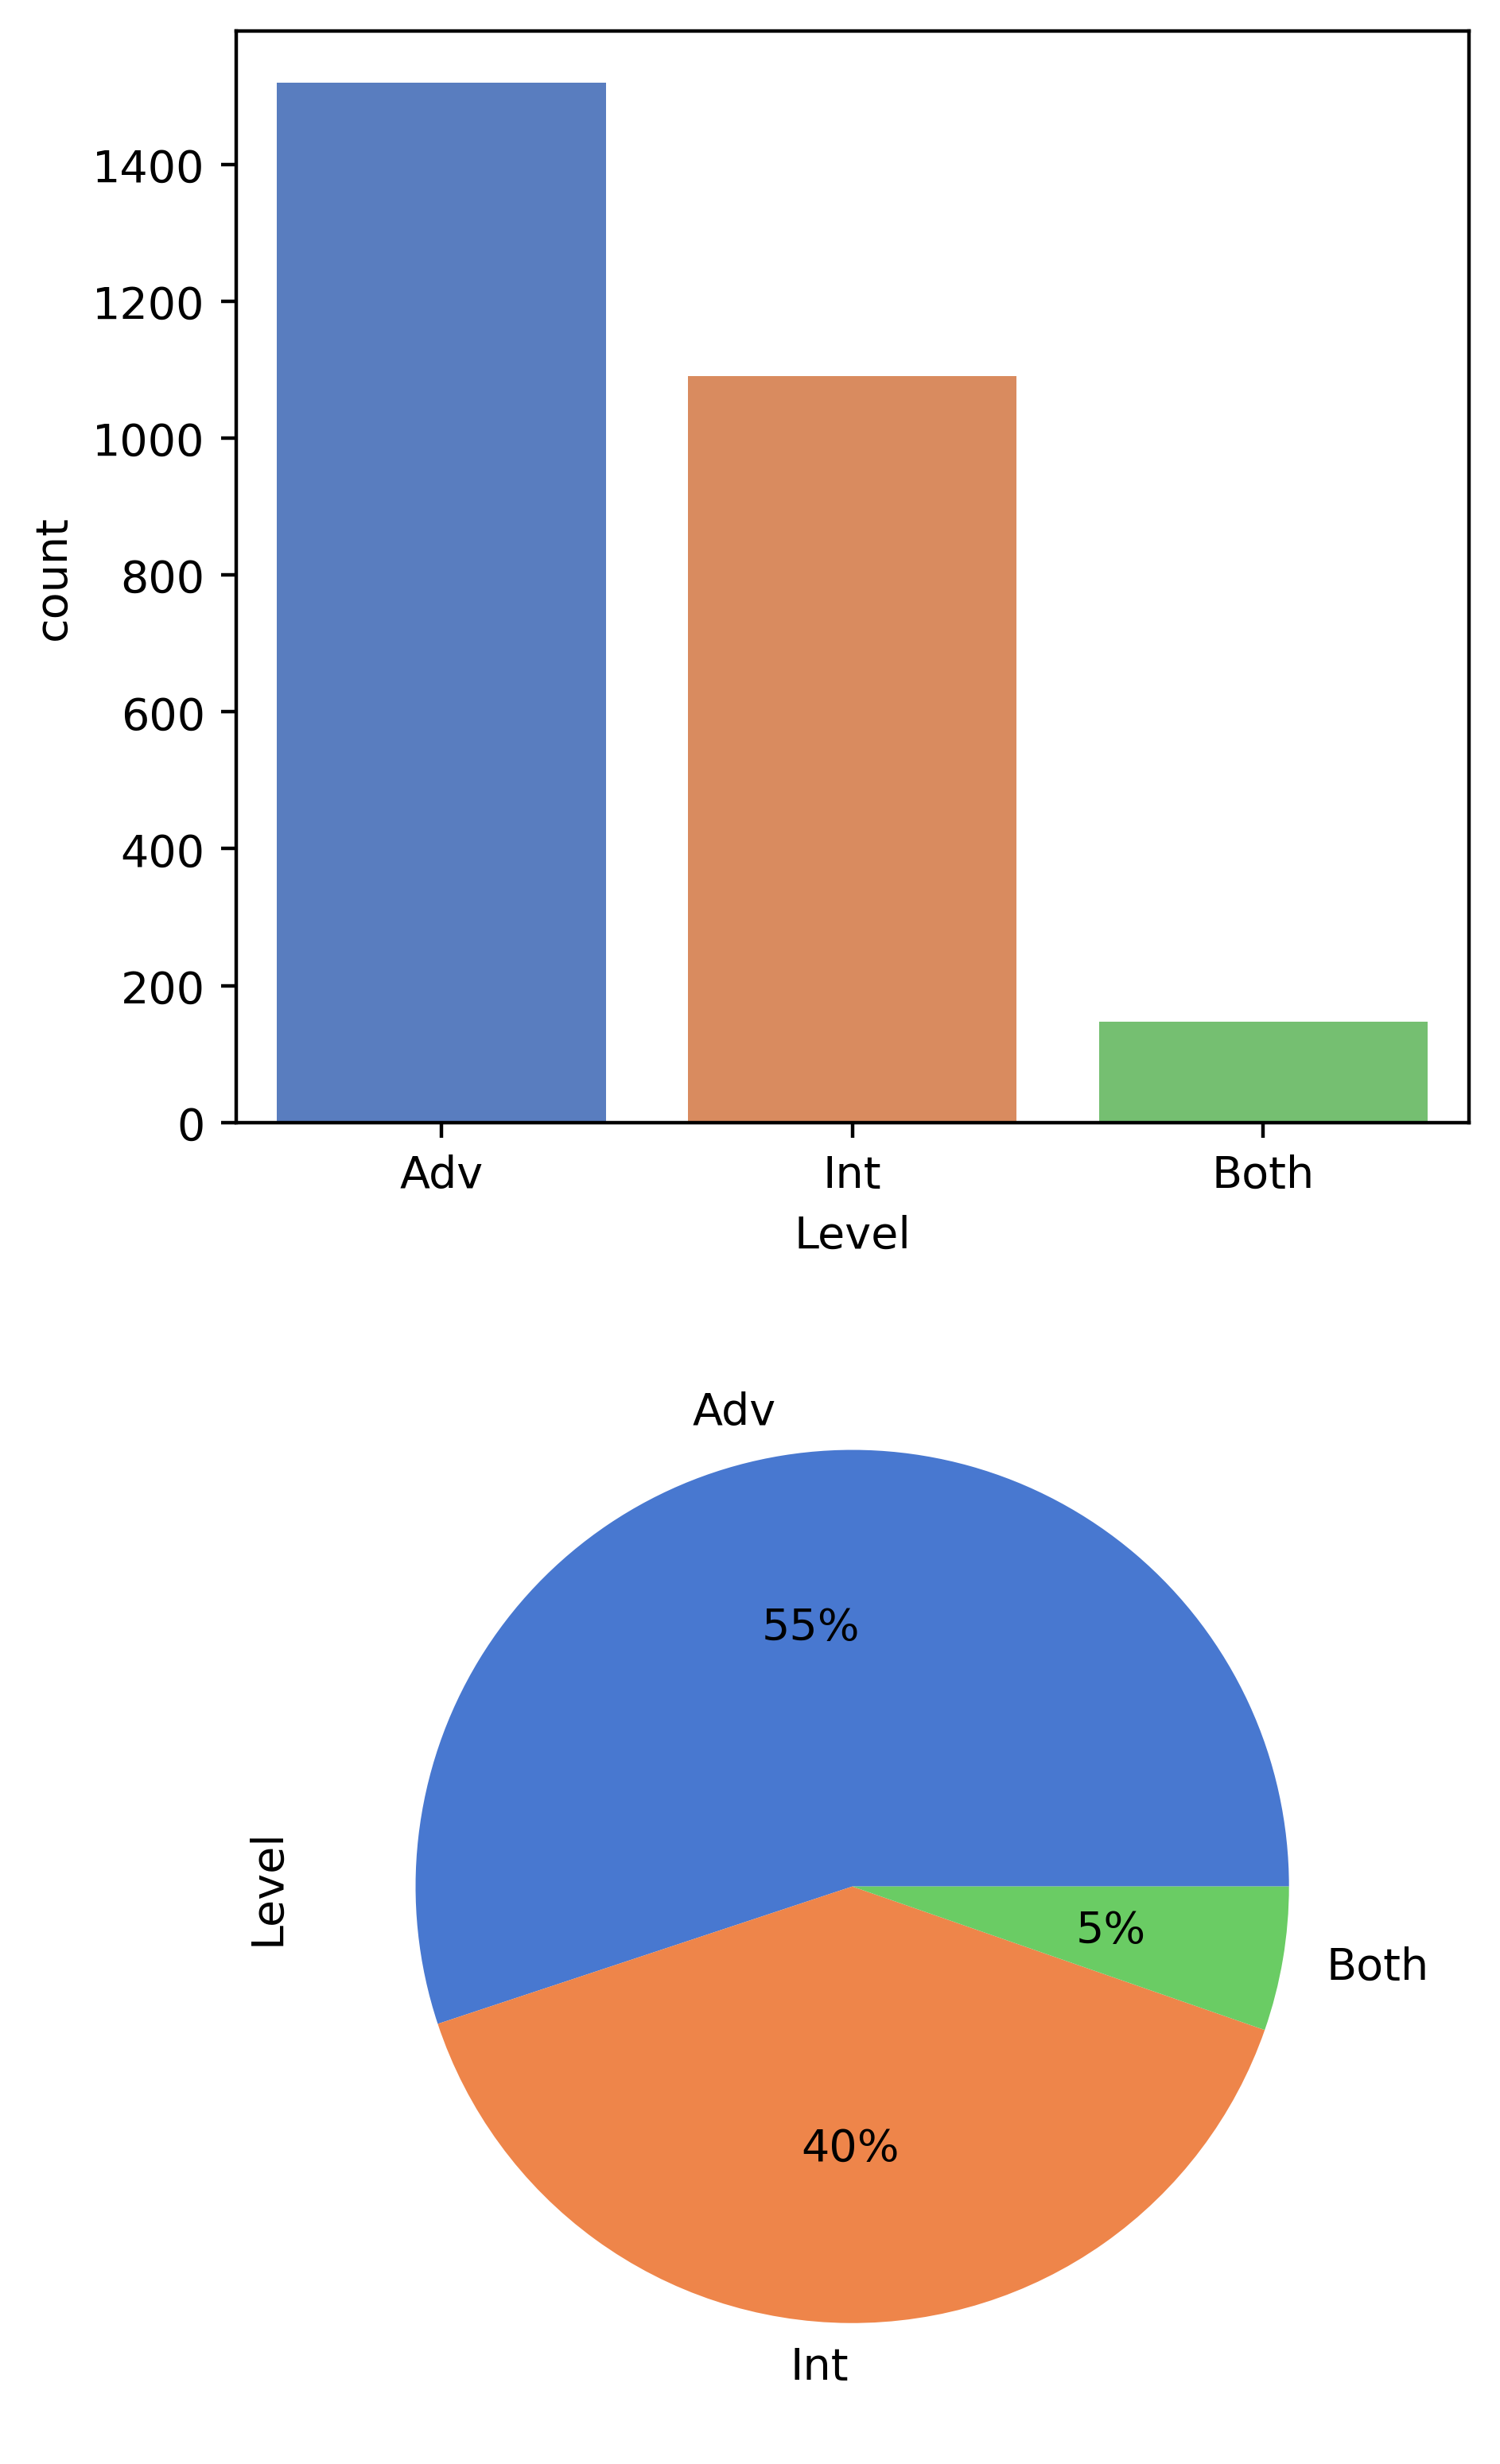

In [34]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(2, 1, figsize=(5,10), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Level', data=df_vocab, ax=axes[0], palette='muted')
df_vocab['Level'].value_counts().plot.pie(ax=axes[1], autopct='%.0f%%', colors=colors)

filename1 = 'Item_Breakdown_by_Level'
plt.savefig(filename1+'.png', facecolor=('#e8f4f0'))

In [35]:
df_vocab['POS'].value_counts()

['NOUN']     1209
['VERB']     1041
['ADJ']       308
['ADV']        73
['ADP']        66
['PROPN']      11
['SCONJ']      10
['NUM']         8
['PART']        8
['PRON']        8
['DET']         8
['CCONJ']       5
['AUX']         2
Name: POS, dtype: int64

In [47]:
vocab_ct = pd.crosstab(df_vocab['Level'],df_vocab['POS'], normalize=True)
df_vocab_ct = vocab_ct.style.format('{:.2%}')
df_vocab_ct
#dfi.export(df_vocab_ct, "LevelPosPercent.png")

POS,['ADJ'],['ADP'],['ADV'],['AUX'],['CCONJ'],['DET'],['NOUN'],['NUM'],['PART'],['PRON'],['PROPN'],['SCONJ'],['VERB']
Level,,,,,,,,,,,,,
Adv,5.73%,1.02%,1.34%,0.04%,0.11%,0.04%,24.88%,0.15%,0.15%,0.07%,0.25%,0.04%,21.29%
Both,0.44%,0.04%,0.07%,0.00%,0.00%,0.00%,1.41%,0.00%,0.00%,0.00%,0.07%,0.00%,3.30%
Int,5.01%,1.34%,1.23%,0.04%,0.07%,0.25%,17.56%,0.15%,0.15%,0.22%,0.07%,0.33%,13.17%


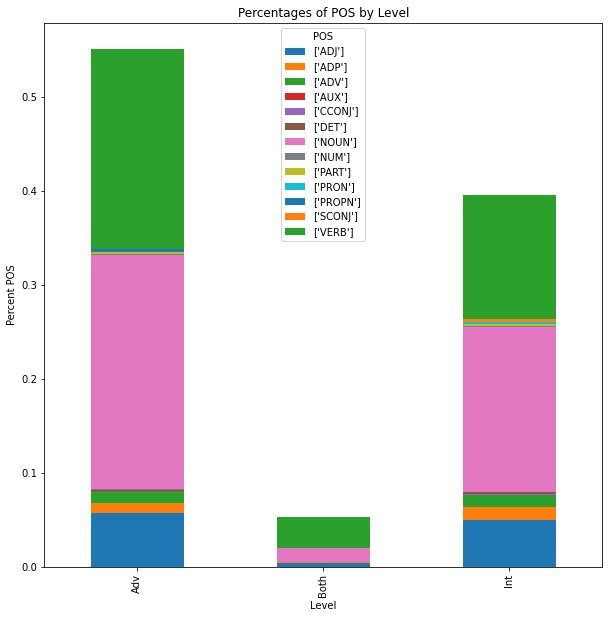

In [46]:
vocab_ct.plot.bar(stacked=True, figsize=(10,10))
plt.title('Percentages of POS by Level')
plt.xlabel('Level')
plt.ylabel('Percent POS')
filename4 = 'PercentagePOSbar'
plt.savefig(filename4+'.png', facecolor=('#e8f4f0'))
plt.show()

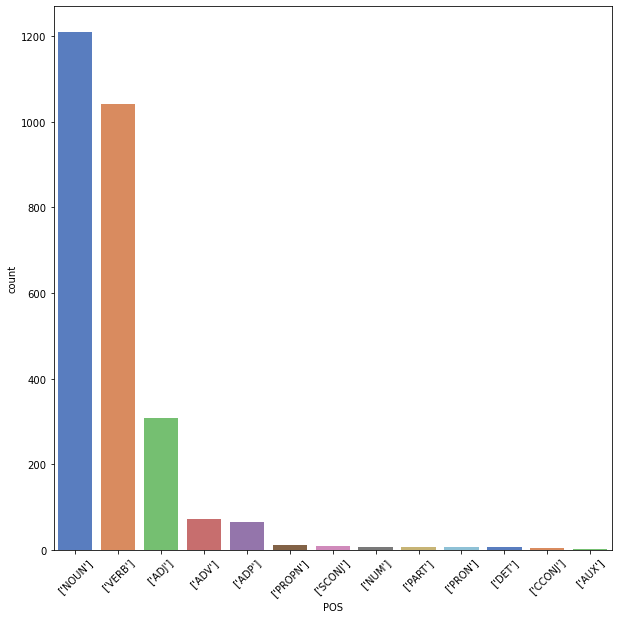

In [38]:
colors = sns.color_palette('muted')
plt.figure(figsize=(10,10))
chart1 = sns.countplot(x='POS', data=df_vocab, palette='muted', order=df_vocab['POS'].value_counts().index)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

filename2 = 'Total_POS'
plt.savefig(filename2+'.png', facecolor=('#e8f4f0'))

In [39]:
pos_by_level = df_vocab.groupby(['Level','POS']).size().reset_index()
pos_by_level

,Level,POS,0
0,Adv,['ADJ'],158
1,Adv,['ADP'],28
2,Adv,['ADV'],37
3,Adv,['AUX'],1
4,Adv,['CCONJ'],3
5,Adv,['DET'],1
6,Adv,['NOUN'],686
7,Adv,['NUM'],4
8,Adv,['PART'],4
9,Adv,['PRON'],2


In [40]:
table1 = pd.pivot_table(pos_by_level, index=['Level'], columns=['POS'])
table1 = table1.fillna(0).astype(int)
table1

0                                                             \
POS   ['ADJ'] ['ADP'] ['ADV'] ['AUX'] ['CCONJ'] ['DET'] ['NOUN'] ['NUM']   
Level                                                                      
Adv       158      28      37       1         3       1      686       4   
Both       12       1       2       0         0       0       39       0   
Int       138      37      34       1         2       7      484       4   

                                                      
POS   ['PART'] ['PRON'] ['PROPN'] ['SCONJ'] ['VERB']  
Level                                                 
Adv          4        2         7         1      587  
Both         0        0         2         0       91  
Int          4        6         2         9      363

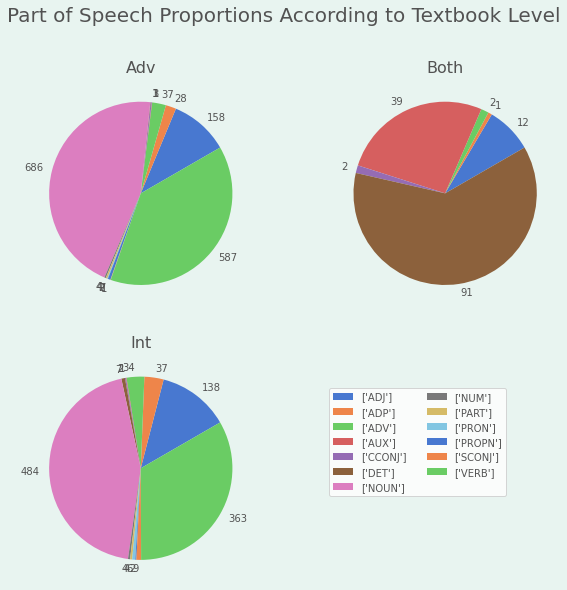

In [41]:
font_color = '#525252'

fig, axes = plt.subplots(2, 2, figsize=(10,10), facecolor='#e8f4f0')
fig.delaxes(ax= axes[1,1])

for i, (idx,row) in enumerate(table1.iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum()*.0002)]
    ax.pie(row,
           labels=row.values,
           startangle=30,
           colors=sns.color_palette('muted', 13),
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index],
                        bbox_to_anchor=(1.3, .87),
                        loc='upper left',
                        ncol=2,
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color)
        
fig.subplots_adjust(wspace=.2)

title = fig.suptitle('Part of Speech Proportions According to Textbook Level',
                     y=.95, fontsize=20, color=font_color)

plt.subplots_adjust(top=0.85, bottom=0.15)

filename3 = 'POS_Level_Comparisons'
plt.savefig(filename3+'.png', facecolor=('#e8f4f0'))